# [**Jump to Tasks**](#Tasks)

# Image Processing and Manipulation with OpenCV

In [2]:
!pip install opencv-python

In [3]:
!wget https://www.birzeit.edu/sites/default/files/buildings.jpg

--2024-08-12 10:06:01--  https://www.birzeit.edu/sites/default/files/buildings.jpg
Resolving www.birzeit.edu (www.birzeit.edu)... 104.22.9.107, 172.67.38.181, 104.22.8.107, ...
Connecting to www.birzeit.edu (www.birzeit.edu)|104.22.9.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258627 (253K) [image/jpeg]
Saving to: ‘buildings.jpg’

buildings.jpg       100%[===================>] 252.57K   644KB/s    in 0.4s    

2024-08-12 10:06:03 (644 KB/s) - ‘buildings.jpg’ saved [258627/258627]



## Loading and Displaying an Image

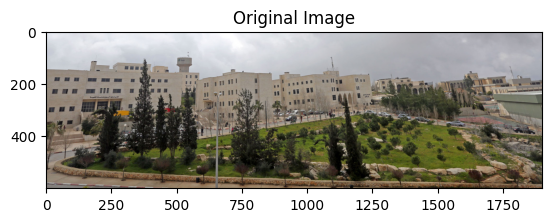

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load an image
image = cv.imread('buildings.jpg')

# Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

## Grayscale Conversion

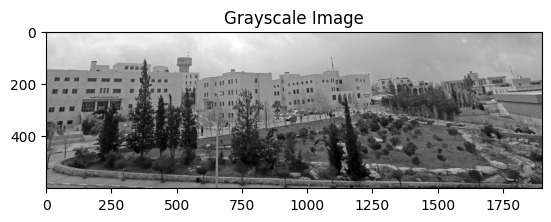

In [5]:
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

## Image Transformation

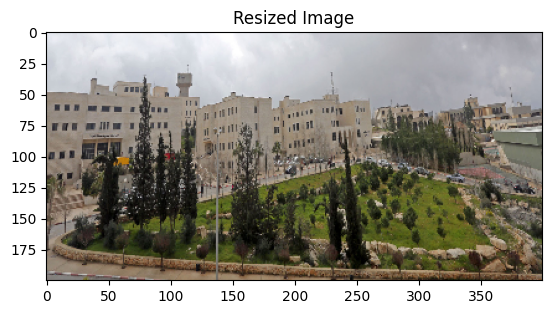

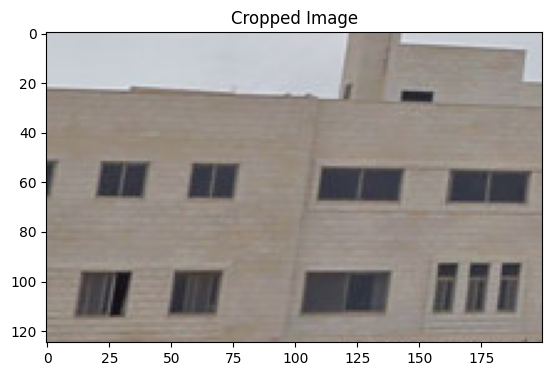

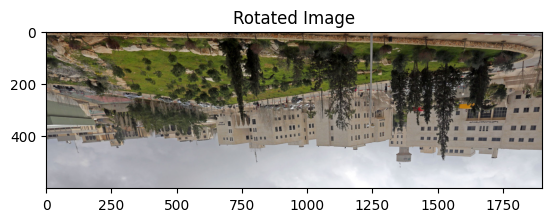

In [6]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Resize and crop the image
resized_image = cv.resize(image, (400, 200))
cropped_image = image[125:250, 50:250]

# Rotate the image
rows, cols = image.shape[:2]

M = cv.getRotationMatrix2D((cols / 2, rows / 2), 180, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))

# Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()

plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()

plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

## Guassian Blurring

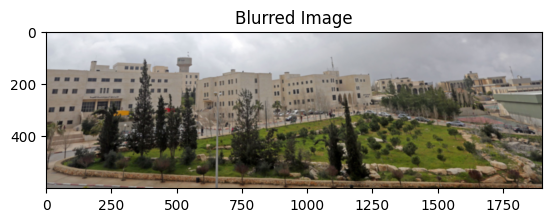

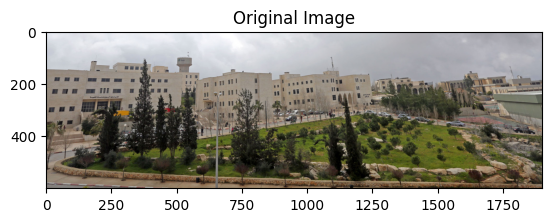

In [7]:
blurred_image = cv.GaussianBlur(image, (7, 7), 0)

# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()

plt.imshow(image)
plt.title('Original Image')
plt.show()

## Edge Detection

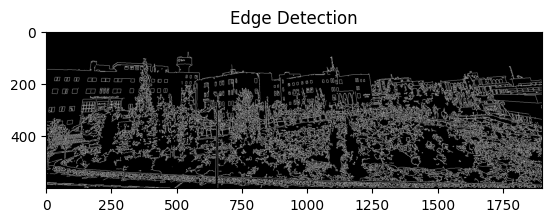

In [8]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

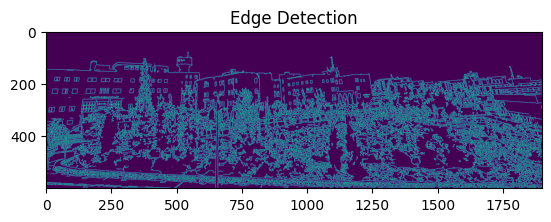

In [9]:
# Perform edge detection using Canny
edges = cv.Canny(image, 50, 150)

# Display the result
plt.imshow(edges)
plt.title('Edge Detection')
plt.show()

Here we can see the edge detection on both colored image and grayscaled image.

# Image Classificaiton / Object Recognition

## Image Classification with MLP

###Loading Images

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


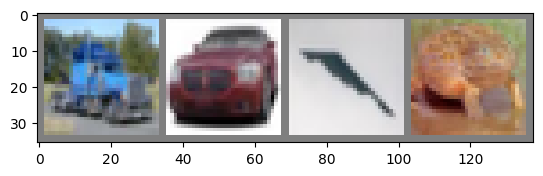

truck car   plane frog 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

###Defining the Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(3072, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

cuda:0


Net(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

###Define Loss Function and Opitimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###Train the Network

In [ ]:
net.train()
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.941
[1,  4000] loss: 1.725
[1,  6000] loss: 1.667
[1,  8000] loss: 1.636
[1, 10000] loss: 1.602
[1, 12000] loss: 1.583
[2,  2000] loss: 1.522
[2,  4000] loss: 1.508
[2,  6000] loss: 1.482
[2,  8000] loss: 1.482
[2, 10000] loss: 1.482
[2, 12000] loss: 1.505
Finished Training


### Test the Network on the Test Data

In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 47 %


Accuracy of MLP model on the images is 47%.

## Image Classification with CNNs

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.conv1(x)
    # print(x.shape)
    x = F.relu(x)
    # print(x.shape)
    x = self.pool(x)
    # print(x.shape)

    x = self.conv2(x)
    # print(x.shape)
    x = F.relu(x)
    # print(x.shape)
    x = self.pool(x)
    # print(x.shape)
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net_CNN = NetCNN()
net_CNN = net_CNN.to(device)

###Loading Images

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


###Define Loss Function and Opitimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###Train the Network

In [ ]:
net_CNN.train()
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net_CNN(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.306
[1,  4000] loss: 2.307
[1,  6000] loss: 2.306
[1,  8000] loss: 2.305
[1, 10000] loss: 2.305
[1, 12000] loss: 2.305
[2,  2000] loss: 2.305
[2,  4000] loss: 2.307
[2,  6000] loss: 2.305
[2,  8000] loss: 2.304
[2, 10000] loss: 2.305
[2, 12000] loss: 2.306
Finished Training


### Test the Network on the Test Data

In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
net_CNN.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net_CNN(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 10 %


Accuracy using the CNN model on the images is 10%

## Transfer Learning

### Finetuning the ConvNet

In [ ]:
from torchvision import datasets, models

net_alexnet = models.alexnet(weights='IMAGENET1K_V1')
net_alexnet.classifier[6] = nn.Linear(4096, 10)
net_alexnet = net_alexnet.to(device)

#### Loading Images

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


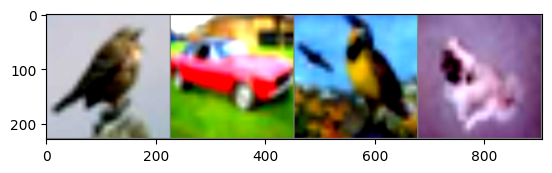

bird  car   bird  dog  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#### Define Loss Function and Optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Train the Network

In [ ]:
net_alexnet.train()
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net_alexnet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.451
[1,  4000] loss: 2.456
[1,  6000] loss: 2.455
[1,  8000] loss: 2.454
[1, 10000] loss: 2.464
[1, 12000] loss: 2.454
[2,  2000] loss: 2.455
[2,  4000] loss: 2.463
[2,  6000] loss: 2.457
[2,  8000] loss: 2.449
[2, 10000] loss: 2.451
[2, 12000] loss: 2.461
Finished Training


#### Test Network on Test Data

In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
net_alexnet.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net_alexnet(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 11 %


Accuracy using AlexNet ConvNet finetuning is 11%

### Finetuning vs Learning From Scratch

In [ ]:
from torchvision import datasets, models

net_alexnet_random = models.alexnet()
net_alexnet_random.classifier[6] = nn.Linear(4096, 10)
net_alexnet_random = net_alexnet_random.to(device)

In [ ]:
net_alexnet_random.train()
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net_alexnet_random(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.303
[1,  6000] loss: 2.303
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1, 12000] loss: 2.303
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2, 12000] loss: 2.303
Finished Training


In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
net_alexnet_random.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net_alexnet_random(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 10 %


Accuracy using AlexNet is 10%

# Tasks

## Task 1

To find the shape of the image we can run the following.

In [ ]:
image.shape

(600, 1900, 3)

- Width = 1900px
- Height = 600px
- Color Channels = 3 (RGB)

## Task 2

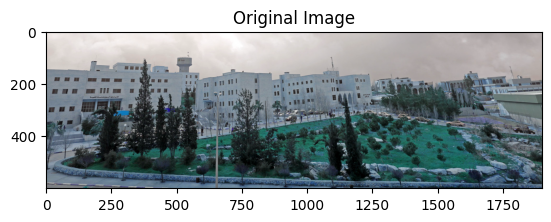

In [ ]:
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow() works with color channels in RGB order. So if the image read from OpenCV (which reads images in BGR order) wasn't converted to from BGR to RGB it will appear with red and blue channels replaced, so the colors will not be accurate.

## Task 3

In [ ]:
gray_image.shape

(600, 1900)

- Width = 1900px
- Height = 600px
- Color Channels = None (Because it is grayscale)

## Task 4

Original image:

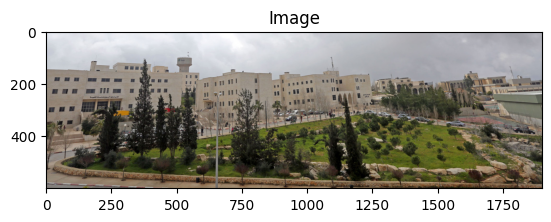

In [13]:
plt.imshow(image)
plt.title('Image')
plt.show()

Rotating the image on the upper left corner (0,0)

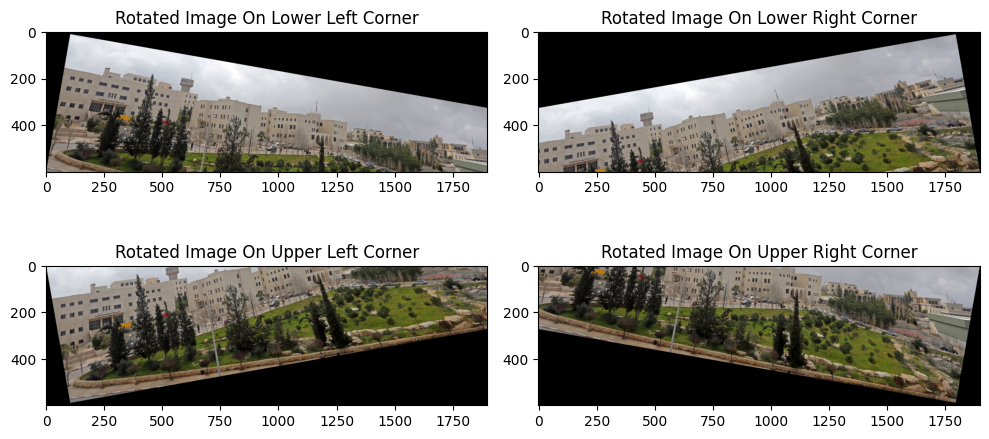

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
rows, cols = image.shape[:2]

M = cv.getRotationMatrix2D((0, rows), -10, 1)
rotated_image = cv.warpAffine(image, M, (0, 0))
axes[0][0].imshow(rotated_image)
axes[0][0].set_title('Rotated Image On Lower Left Corner')

M = cv.getRotationMatrix2D((cols, rows), 10, 1)
rotated_image = cv.warpAffine(image, M, (0, 0))
axes[0][1].imshow(rotated_image)
axes[0][1].set_title('Rotated Image On Lower Right Corner')

M = cv.getRotationMatrix2D((0, 0), 10, 1)
rotated_image = cv.warpAffine(image, M, (0, 0))
axes[1][0].imshow(rotated_image)
axes[1][0].set_title('Rotated Image On Upper Left Corner')

M = cv.getRotationMatrix2D((cols, 0), -10, 1)
rotated_image = cv.warpAffine(image, M, (0, 0))
axes[1][1].imshow(rotated_image)
axes[1][1].set_title('Rotated Image On Upper Right Corner')


plt.tight_layout()
plt.show()


## Task 5

The tuple (7, 7) represents the size of the Gaussian kernel used for the blur operation.

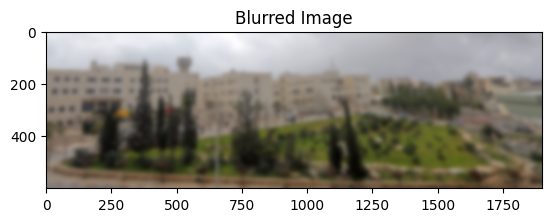

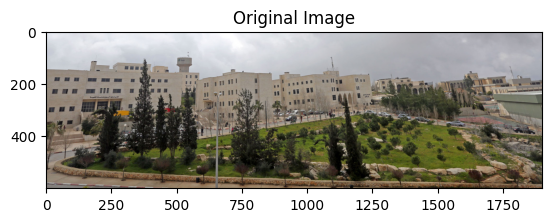

In [ ]:
blurred_image = cv.GaussianBlur(image, (55, 55), 0)

# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()

plt.imshow(image)
plt.title('Original Image')
plt.show()

increasing the tuple (making sure its odd) will blur the picture way more.

## Task 6

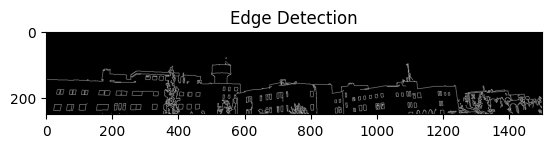

In [ ]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 350)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

- Image: The image we want to perform edge deteciton on.

- Threshold1: Lower threshold for the hysteresis procedure. The minimum     intensity gradient required for a pixel to be considered an edge. A lower value will result in more edges being detected, including weaker edges.

- Threshold2: Higher threshold for the hysteresis procedure, used to link strong edges together. A higher value will result in longer continuous edges, as weaker edges that are not well-connected to strong edges will be eliminated.

zooming on edges:

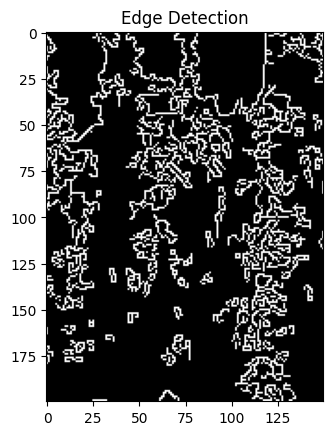

In [ ]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 350)

# Display the result
plt.imshow(edges[250:450, 400:550], cmap='gray')
plt.title('Edge Detection')
plt.show()

## Task 7

- transforms.ToTensor(): This transform converts the input image, which is in the form of a PIL Image or a NumPy array with values in the range [0, 255], into a PyTorch tensor.
The transformation scales the pixel values to the range [0, 1]. It does so by dividing each pixel value by 255, making the image data suitable for processing by neural networks.

- transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)): This transform normalizes the tensor by subtracting the mean and dividing by the standard deviation along each channel.

- The first tuple (0.5, 0.5, 0.5) represents the mean for each channel (R, G, B), and the second tuple (0.5, 0.5, 0.5) represents the standard deviation for each channel.

The normalization is applied channel-wise, so for each channel, the mean is subtracted, and the result is divided by the standard deviation.
The purpose of this normalization is to center the data around zero and scale it to have a standard deviation of 1, which helps in training neural networks more effectively.

## Task 8

**np.transpose(npimg, (1, 2, 0))** is used to change the order of dimensions in the NumPy array npimg. (1,2,0) means the the second property becomes first, the third becomes second, and the first becomes third. So, (channels, height, width) becomes (height, width, channels).

## Task 9

The number of input features. Which is the result of multiplying 32 *32 * 3 (W * H * RGB).

## Task 10

#### Number of Layers: **5**

####  nn.Conv2d(in_channels, out_channels, kernel_size):
- in_channels: # input channels, if RGB then 3.
- out_channels: # output channels. (feature maps)
- kernel_size: Size of the convolutional kernel.


#### nn.MaxPool2d(kernel_size, stride):
- kernel_size: Size of the pooling window.
- stride: The step size between successive pooling operations.


#### In the first linear layer:
The input size is calculated based on the dimensions of the output of the last convolutional layer (conv2).
- 16 * 5 * 5 corresponds to:
  - 16: The number of output channels from the last convolutional layer (conv2).
  - 5 * 5: The spatial dimensions of the feature map produced by the last convolutional layer (conv2).